# Chat Fine-tuning

Quantized Low-Rank Adapter Model Fine-tuning

---

Built by Trelis. Find us on [HuggingFace](https://huggingface.co/Trelis).

This script is commercially licensed and available for purchase per seat/user at [Trelis.com/ADVANCED-fine-tuning](https://Trelis.com).

You can also purchase access to the full GitHub Repo, including:
1. Embedding Notebook
2. Fine-tuning Notebook Supervised Learning + Data-prep
3. Fine-tuning Notebook Unsupervised Learning + Data-prep
4. Dataset Preparation
5. Quantization Notebooks (GGUF and AWQ)

---
## Getting Set Up
### Colab Setup
- You can run training on a free Google Colab Notebook for 7B models if you use quantization.
- Save a copy of this notebook: Go to File -> Save a copy in Drive. (optional, but needed if you want to make changes).
- Go to the menu -> Runtime -> Change Runtime Type - Select GPU (T4). [Make sure to comment out flash attention when loading the model if you are using a T4 as flash is only supported on newer GPUs).
- Then go to Runtime -> Run all.
- It takes about 2-5 mins* for the installation (which all happens in the cloud in this notebook).
- Once all cells have run, you'll find the chat interface at the bottom.-
- *Optionally, you can comment back in the code below to mount Google Drive. This will download the model to your Google Drive, bringing down the total start time to about 3 mins.

### Setup on an Ampere GPU (A40, A6000, A100, H100) with Cuda 12.1 and Pytorch 2.2.1 - RECOMMENDED.
Ampere architecture GPUs allow for the use of Flash Attention, which provides a speed up. Otherwise, you  need to train with fp16 instead of bf16.

For the best reproducibility, run this script on an A6000 using a one-click template from Runpod ([affiliate link for sign up here](https://runpod.io/?ref=jmfkcdio), supports Trelis' YouTube channel) or VastAI ([affiliate link for sign up here](https://cloud.vast.ai/?ref_id=98762), supports Trelis' YouTube channel):
- Runpod one-click template [here](https://runpod.io/gsc?template=ifyqsvjlzj&ref=jmfkcdio) - easier setup.
- Vast.ai one-click template [here](https://cloud.vast.ai/?ref_id=98762&creator_id=98762&name=Fine-tuning%20Notebook%20by%20Trelis%20-%20Cuda%2012.1) - offers smaller GPUs (which are cheaper to run).

### Connect Google Drive

Optional but saves time by caching the model and allows for training data to be saved on Drive.

In [7]:
# # https://stackoverflow.com/questions/56081324/why-are-google-colab-shell-commands-not-working
# import locale
# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding

In [8]:
# from google.colab import drive
# drive.mount('/content/drive')

In [9]:
# import os
# cache_dir = "/content/drive/My Drive/huggingface_cache"
# os.makedirs(cache_dir, exist_ok=True) # Ensure the directory exists

# Installation

# Set up a Virtual Environment (Optional but can help avoid package conflicts)
- Run the cell below to create a setup.py file.
- Run the following cell to execute that setup.
- Go to the top right corner and click on the kernel.
- Select "trelisEnv"

In [1]:
%%writefile setup.py
import subprocess
import os

# Create virtual environment
subprocess.run(["python", "-m", "venv", "trelisEnv"])

# Activate virtual environment (This step is intended for use outside of Jupyter)
# For Jupyter, we skip activation and directly install packages in the next steps

# Install ipykernel (This may not work as intended because the environment is not activated)
subprocess.run(["pip", "install", "ipykernel"])

# Install Jupyter kernel (This installs the kernel but doesn't affect the current Jupyter session)
subprocess.run(["python", "-m", "ipykernel", "install", "--user", "--name=trelisEnv"])

Writing setup.py


In [2]:
%%capture
%run setup.py


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python -m pip install --upgrade pip


Installed kernelspec trelisEnv in /root/.local/share/jupyter/kernels/trelisenv


You may need to wait a few moments for trelisEnv to appear in the list of Kernels to the top right of your notebook.

## Standard Install

In [34]:
# stable versions for this script (DO NOT INSTALL FOR UNSLOTH, see below instead)
!python -m pip install --upgrade pip
!pip install transformers==4.38.1 -q -U
!pip install bitsandbytes==0.42.0 -q -U
!pip install peft==0.8.2 -q -U
!pip install accelerate==0.27.2 -q -U
!pip install flash-attn==2.5.5 -q -U
!pip install datasets==2.17.1 -q -U
!pip install scipy==1.12.0 -q -U
!pip install trl==0.7.11 -q -U
!pip install hf_transfer==0.1.5 -q -U
!pip install huggingface_hub==0.20.3 -q -U
!pip install wandb==0.16.3 -q -U

# # latest versions (may break the script due to updates)
# !python -m pip install --upgrade pip
# !pip install -U -q transformers
# !pip install -q -U bitsandbytes
# !pip install -q -U peft
# !pip install -q -U accelerate
# !pip install -q datasets
# !pip install -q -U scipy
# !pip install -q -U trl
# !pip install -U flash-attn -q
# !pip install hf_transfer

## Required for Yi models
# !pip install sentencepiece -q -U

!transformers-cli env

# CONSIDER RESTARTING THE KERNEL AFTER INSTALL to ensure all updates are applied.

In [36]:
# # #If using DoRA (this may soon not be needed as DoRA will be part of transformers). DO NOT RUN THIS IF RUNNING LoRA or Unsloth LoRA
# !pip uninstall peft -y
# !pip install git+https://github.com/BenjaminBossan/peft.git@feat-dora -q

## Unsloth Install

In [50]:
# import torch
# import subprocess
# import sys

# # Determine CUDA version and PyTorch version
# cuda_version = torch.version.cuda
# pytorch_version = torch.__version__
# major_version, minor_version = torch.cuda.get_device_capability()

# !python -m pip install --upgrade pip
# !pip install datasets==2.17.1 -q -U
# !pip install scipy==1.12.0 -q -U
# !pip install trl==0.7.11 -q -U
# !pip install hf_transfer==0.1.5 -q -U
# !pip install huggingface_hub==0.20.3 -q -U
# !pip install wandb==0.16.3 -q -U
# import torch
# import subprocess
# import sys

# # Determine CUDA version and PyTorch version
# cuda_version = torch.version.cuda
# pytorch_version = torch.__version__
# major_version, minor_version = torch.cuda.get_device_capability()

# print(f"Cuda Version: {cuda_version}\nPyTorch Version: {pytorch_version}\nCuda Version: {major_version}.{minor_version}")

# !python -m pip install --upgrade pip
# !pip install datasets==2.17.1 -q -U
# !pip install scipy==1.12.0 -q -U
# !pip install trl==0.7.11 -q -U
# !pip install hf_transfer==0.1.5 -q -U
# !pip install huggingface_hub==0.20.3 -q -U
# !pip install wandb==0.16.3 -q -U

# def get_install_command(cuda_version, pytorch_version, major_version):
#     base_url = "git+https://github.com/unslothai/unsloth.git"
#     ampere_path = "_ampere" if major_version >= 8 else ""
    
#     # Determine the appropriate CUDA path based on the CUDA version
#     if float(cuda_version) >= 12.1:
#         cuda_path = "cu121"
#     elif float(cuda_version) >= 11.8:
#         cuda_path = "cu118"
#     else:
#         # If CUDA version is not supported, print a warning and exit
#         return "Unsupported CUDA version. Please use CUDA 11.8 or greater."

#     # Append _ampere if applicable
#     if major_version >= 8:
#         cuda_path += ampere_path

#     # Adjust the path based on PyTorch version
#     if "2.1.0" in pytorch_version:
#         specific_path = ""
#     elif "2.1.1" in pytorch_version:
#         specific_path = "_torch211"
#     elif "2.2.0" in pytorch_version:
#         specific_path = "_torch220"
#     else:
#         # If PyTorch version is not explicitly handled, use a generic approach
#         specific_path = ""

#     cuda_path += specific_path

#     unsloth_install_command = f'pip install -q "unsloth[{cuda_path}] @ {base_url}"'
    
#     return unsloth_install_command
    
# # Execute the installation command
# install_command = get_install_command(cuda_version, pytorch_version, major_version)
# print(f"Running: {install_command}")
# subprocess.run(install_command, shell=True, check=True)

In [51]:
# print(f"Cuda Version: {cuda_version}\nPyTorch Version: {pytorch_version}\nCuda Version: {major_version}.{minor_version}")

!RECOMMENDED: SHUT DOWN THE KERNEL AFTER INSTALLING TO ENSURE ALL UPDATED PACKAGES ARE LOADED.

# Load Model

In [1]:
# Required when training models/data that are gated on HuggingFace, and required for pushing models to HuggingFace
from huggingface_hub import notebook_login
notebook_login()

In [1]:
%env HF_HUB_ENABLE_HF_TRANSFER=True

env: HF_HUB_ENABLE_HF_TRANSFER=True


In [2]:
cache_dir='' #commnt out if you have already set Google Drive as cache_dir

# using a base model here for unsupervised trial.
# model_id = "PY007/TinyLlama-1.1B-intermediate-step-715k-1.5T"
# model_id = "meta-llama/Llama-2-7b-hf"
# model_id = "meta-llama/Llama-2-7b-chat-hf"
# model_id = "meta-llama/Llama-2-13b-chat-hf"
# model_id  = "tiiuae/falcon-40b-instruct"
# model_id  = "tiiuae/falcon-7b"
# model_id  = "tiiuae/falcon-7b-instruct"
# model_id  = "tiiuae/falcon-180B"
# model_id  = "tiiuae/falcon-40B"\
# model_id = "Trelis/TinyLlama-1.1B-chat-SFT"
# model_id = "TinyLlama/TinyLlama-1.1B-intermediate-step-1431k-3T"
model_id = "deepseek-ai/deepseek-coder-1.3b-base"
# model_id = "mistralai/Mistral-7B-v0.1"

## Load the Model and Tokenizer for LoRA or DoRA

In [3]:
from transformers import AutoTokenizer, AutoModelForCausalLM, BitsAndBytesConfig, AutoConfig
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

# config = AutoConfig.from_pretrained(model_id)
# config.max_position_embeddings = 4096 # (input + output) tokens can now be up to 4096

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    # config=config,
    # quantization_config=bnb_config,
    # rope_scaling={"type": "linear", "factor": 2.0},
    device_map='auto',
    # trust_remote_code=False,
    torch_dtype=torch.bfloat16,
    attn_implementation="flash_attention_2", # works with Llama models and reduces memory reqs
    cache_dir=cache_dir)

tokenizer = AutoTokenizer.from_pretrained(model_id,use_fast=True,trust_remote_code=True)

/usr/local/lib/python3.10/dist-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


## Load the Model and Tokenizer For Unsloth

In [4]:
# from unsloth import FastLanguageModel #for unsloth
# import torch

# max_seq_length = 512*8 #you'll need to set this below for the trainer too.

# # Load model
# model, tokenizer = FastLanguageModel.from_pretrained(
#     model_name = model_id,
#     max_seq_length = max_seq_length,
#     dtype = None, # None for auto detection. Float16 for Tesla T4, V100, Bfloat16 for Ampere+
#     load_in_4bit = False, # Use 4bit quantization to reduce memory usage. Must be set to false to load in bf16.
#     cache_dir=cache_dir
# )

## Loading Checks

In [5]:
# Check there are no parameters overflowing onto cpu (meta).
for n, p in model.named_parameters():
    if p.device.type == "meta":
        print(f"{n} is on meta!")

In [6]:
print(model.config.max_position_embeddings)
print(model.config.eos_token_id)

16384
32014


# Prepare for LoRA fine-tuning

In [7]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model and lists which parameters are trainable.
    """
    trainable_params = 0
    non_trainable_params = 0
    all_params = 0

    print("Trainable Parameters:")
    for name, param in model.named_parameters():
        all_params += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
            print(f"  {name}")
        else:
            non_trainable_params += param.numel()

    print("\nNon-Trainable Parameters:")
    for name, param in model.named_parameters():
        if not param.requires_grad:
            print(f"  {name}")

    print(
        f"\nSummary:\n  Trainable params: {trainable_params}\n  Non-Trainable params: {non_trainable_params}\n  All params: {all_params}\n  Trainable%: {100 * trainable_params / all_params}"
    )

## Standard LoRA or DoRA

In [8]:
# print(model)

In [9]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable() #Comment this in to save on VRAM
# model = prepare_model_for_kbit_training(model) # only set this if using quantization.

from peft import LoraConfig, get_peft_model

peft_config = LoraConfig( #matching the Llama recipe
    r=8,
    lora_alpha=32,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        # "self_attn.rotary_emb.inv_freq",
        "gate_proj",
        "up_proj",
        "down_proj",
        "lora_magnitude_vector", #required for DoRA
        # "input_layernorm.weight",
        # "post_attention_layernorm.weight",
        # "model.norm.weight",
        # "lm_head.weight",
        # "dense_h_to_4h", #for falcon
        # "dense_4h_to_h", #for falcon
        # "query_key_value", #for falcon
        # "dense" #for falcon
    ],
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM",
    # use_dora=True # only for DoRA
)

model = get_peft_model(model, peft_config) #move to a peft model

In [10]:
# print_trainable_parameters(model)

## Unsloth LoRA

In [11]:
# # Do model patching and add fast LoRA weights
# model = FastLanguageModel.get_peft_model(
#     model,
#     r = 8,
#     target_modules = ["q_proj", "k_proj", "v_proj", "o_proj",
#                       "gate_proj", "up_proj", "down_proj",],
#     lora_alpha = 32,
#     lora_dropout = 0, # Dropout = 0 is currently optimized
#     bias = "none",    # Bias = "none" is currently optimized
#     use_gradient_checkpointing = True,
#     random_state = 3407,
# )

In [12]:
# print_trainable_parameters(model)

# Set up Tokenizer and Padding

In [13]:
print(tokenizer)
print(tokenizer.vocab_size)

LlamaTokenizerFast(name_or_path='deepseek-ai/deepseek-coder-1.3b-base', vocab_size=32000, model_max_length=16384, is_fast=True, padding_side='left', truncation_side='right', special_tokens={'bos_token': '<｜begin▁of▁sentence｜>', 'eos_token': '<｜end▁of▁sentence｜>', 'pad_token': '<｜end▁of▁sentence｜>'}, clean_up_tokenization_spaces=False),  added_tokens_decoder={
	32000: AddedToken("õ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	32001: AddedToken("÷", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	32002: AddedToken("Á", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	32003: AddedToken("ý", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	32004: AddedToken("À", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	32005: AddedToken("ÿ", rstrip=False, lstrip=False, single_word=False, normalized=True, special=False),
	32006: AddedT

In [14]:
print(tokenizer.bos_token)
print(tokenizer.eos_token)

<｜begin▁of▁sentence｜>
<｜end▁of▁sentence｜>


In [15]:
# OPTIONALLY SET THE CHAT TEMPLATE MANUALLY.
tokenizer.chat_template = "{% if not add_generation_prompt is defined %}\n{% set add_generation_prompt = false %}\n{% endif %}\n{%- set ns = namespace(found=false) -%}\n{%- for message in messages -%}\n    {%- if message['role'] == 'system' -%}\n        {%- set ns.found = true -%}\n    {%- endif -%}\n{%- endfor -%}\n{{bos_token}}{%- if not ns.found -%}\n{{'\\n'}}\n{%- endif %}\n{%- for message in messages %}\n    {%- if message['role'] == 'system' %}\n{{ message['content'] }}\n    {%- else %}\n        {%- if message['role'] == 'user' %}\n{{'### Instruction:\\n' + message['content'] + '\\n'}}\n        {%- else %}\n{{'### Response:\\n' + message['content'] + eos_token}}\n        {%- endif %}\n    {%- endif %}\n{%- endfor %}\n{% if add_generation_prompt %}\n{{'### Response:'}}\n{% endif %}"

#Test the chat template
messages=[
    { 'role': 'user', 'content': "write a quick sort algorithm in python."},
    { 'role': 'assistant', 'content': "here you are."},
    { 'role': 'user', 'content': "great."},
]

inputs = tokenizer.apply_chat_template(messages, tokenize=False)
print(inputs)

<｜begin▁of▁sentence｜>
### Instruction:
write a quick sort algorithm in python.
### Response:
here you are.<｜end▁of▁sentence｜>### Instruction:
great.



In [16]:
## OPTION A - set the pad token to <pad>, if not <|pad|>, if not <unk> if <unk> is in the tokenizer OR set it to the EOS token.
if '<pad>' in tokenizer.get_vocab():
    print('<pad> token is in the tokenizer. Using <pad> for pad')
    # Set the pad token
    tokenizer.pad_token = '<pad>'
elif '<|pad|>' in tokenizer.get_vocab():
    print('<|pad|> token is in the tokenizer. Using <|pad|> for pad')
    # Set the pad token
    tokenizer.pad_token = '<|pad|>'
elif '<unk>' in tokenizer.get_vocab():
    print('<unk> token is in the tokenizer. Using unk for pad')
    # Set the pad token
    tokenizer.pad_token = '<unk>'
else:
    print(f'Using EOS token, {tokenizer.eos_token}, for padding. WARNING, this may not be ideal for chat fine-tuning models.')
    tokenizer.pad_token = tokenizer.eos_token

# OPTION B - create a pad token
# Check if the pad token is already in the tokenizer vocabulary
# if '<pad>' not in tokenizer.get_vocab():
#     print('pad token not in the tokenizer, adding a <pad> token')

#     # Add the pad token
#     tokenizer.add_tokens(['<pad>'])
#     # Set the pad token
#     tokenizer.pad_token = '<pad>'
#     # Resize token embeddings
#     model.resize_token_embeddings(tokenizer.vocab_size)

<pad> token is in the tokenizer. Using <pad> for pad


In [17]:
# Update pad token id in model and its config
model.pad_token_id = tokenizer.pad_token_id
model.config.pad_token_id = tokenizer.pad_token_id

# Check if they are equal
assert model.pad_token_id == tokenizer.pad_token_id, "The model's pad token ID does not match the tokenizer's pad token ID!"

# Print the pad token ids
print('Tokenizer pad token ID:', tokenizer.pad_token_id)
print('Model pad token ID:', model.pad_token_id)
print('Model config pad token ID:', model.config.pad_token_id)
print('Number of tokens now in tokenizer:', tokenizer.vocab_size)

Tokenizer pad token ID: 32018
Model pad token ID: 32018
Model config pad token ID: 32018
Number of tokens now in tokenizer: 32000


In [18]:
print("Special tokens map:", tokenizer.special_tokens_map)
# print("All special tokens:", tokenizer.all_special_tokens)

Special tokens map: {'bos_token': '<｜begin▁of▁sentence｜>', 'eos_token': '<｜end▁of▁sentence｜>', 'pad_token': '<pad>'}


In [19]:
# #Uncomment to switch to left padding, not recommended for unsloth.
# tokenizer.padding_side='left'

In [20]:
# print(tokenizer)

# Set embed and norm layers to trainable (recommended for chat fine-tuning)

In [21]:
# List to hold the names of the trainable parameters
# trainable_params_names = ["word_embeddings","input_layernorm", "ln_f"] #for Falcon
trainable_params_names = ["embed_tokens", "input_layernorm", "post_attention_layernorm"] #for Llama 2 OR Mistral.
# trainable_params_names = ["embed", "norm"] #for DeepSeek Coder

# Set modules to be trainable
for n, p in model.named_parameters():
    if any(k in n for k in trainable_params_names):
        p.requires_grad_(True)
    # else:
    #     p.requires_grad_(False)  # Optional: Set the rest to be not trainable

# Make a dictionary of trainable parameters
trainable_params = {n: p for n, p in model.named_parameters() if p.requires_grad}

# Convert trainable_params to state_dict format
trainable_params_state_dict = {n: p.data for n, p in trainable_params.items()}

In [46]:
print_trainable_parameters(model)

Trainable Parameters:
  base_model.model.model.embed_tokens.weight
  base_model.model.model.layers.0.self_attn.q_proj.lora_A.default.weight
  base_model.model.model.layers.0.self_attn.q_proj.lora_B.default.weight
  base_model.model.model.layers.0.self_attn.k_proj.lora_A.default.weight
  base_model.model.model.layers.0.self_attn.k_proj.lora_B.default.weight
  base_model.model.model.layers.0.self_attn.v_proj.lora_A.default.weight
  base_model.model.model.layers.0.self_attn.v_proj.lora_B.default.weight
  base_model.model.model.layers.0.self_attn.o_proj.lora_A.default.weight
  base_model.model.model.layers.0.self_attn.o_proj.lora_B.default.weight
  base_model.model.model.layers.0.mlp.gate_proj.lora_A.default.weight
  base_model.model.model.layers.0.mlp.gate_proj.lora_B.default.weight
  base_model.model.model.layers.0.mlp.up_proj.lora_A.default.weight
  base_model.model.model.layers.0.mlp.up_proj.lora_B.default.weight
  base_model.model.model.layers.0.mlp.down_proj.lora_A.default.weight
  b

# Set up Evaluation

In [23]:
from transformers import TextStreamer
from peft import PeftModel
import torch
import gc  # import Python's garbage collection module

# Define a stream
def stream(user_prompt, model_type, tokenizer, checkpoint=''):

    if model_type == 'base':
        eval_model = model
    elif model_type == 'fine-tuned':
        eval_model = PeftModel.from_pretrained(model, checkpoint)  # Assuming PeftModel is the intended class
        eval_model = eval_model.to("cuda")

        for n, p in eval_model.named_parameters():
            if p.device.type == "cpu":
                print(f"{n} is on cpu!")
        
    else:
        print('You must set the model_type to base or fine-tuned')
        exit()  # or raise an exception

    # print(f'Proceeding to inference with peft adapters from {checkpoint}')

    eval_model.config.use_cache = True

    messages=[
        { 'role': 'user', 'content': f"{user_prompt.strip()}"},
    ]
    
    inputs = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    inputs = tokenizer([inputs], return_tensors="pt", add_special_tokens=False).to("cuda")

    if "token_type_ids" in inputs:
        del inputs["token_type_ids"]
    
    streamer = TextStreamer(tokenizer)

    print(f'eval_model is on: {next(eval_model.parameters()).device}')  # Debug line
    print(f'input_ids are on: {inputs["input_ids"].device}')  # Debug line

    # Despite returning the usual output, the streamer will also print the generated text to stdout.
    # _ = eval_model.generate(**inputs, streamer=streamer)
    _ = eval_model.generate(**inputs, streamer=streamer, max_new_tokens=100, pad_token_id=tokenizer.pad_token_id, eos_token_id=tokenizer.eos_token_id)
    
    # Clear GPU cache and run garbage collection
    torch.cuda.empty_cache()  # Clear GPU cache
    gc.collect()  # Run garbage collection


def evaluation(model_type, tokenizer, checkpoint=''):
    questions = [
        "What planets are in our solar system?",
        "What are the first five numbers in the Fibonacci series?",
        "Generate a python code snippet to add two numbers."
    ]

    #Optionally provide some correct answers for comparison. This is for manual evaluation. Recommended!
    answers = [
        "",
        "",
        ""
    ]

    for question, answer in zip(questions, answers):
        stream(question, model_type, tokenizer, checkpoint)
        # print("Correct Answer:", answer)
        print('\n\n')

In [24]:
# print(model.config)

In [25]:
print(model.generation_config)

GenerationConfig {
  "bos_token_id": 32013,
  "eos_token_id": 32014
}



In [26]:
evaluation("base", tokenizer)

eval_model is on: cuda:0
input_ids are on: cuda:0
<｜begin▁of▁sentence｜>
### Instruction:
What planets are in our solar system?
### Response:
- Mercury
- Venus
- Earth
- Mars
- Jupiter
- Saturn
- Uranus
- Neptune

### Instruction:What is the distance between Earth and the Sun?
### Response:
- 149,597,870 km

### Instruction:What is the distance between Earth and the Moon?
### Response:
- 384,400 km

###



eval_model is on: cuda:0
input_ids are on: cuda:0
<｜begin▁of▁sentence｜>
### Instruction:
What are the first five numbers in the Fibonacci series?
### Response:
```
1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 1771



eval_model is on: cuda:0
input_ids are on: cuda:0
<｜begin▁of▁sentence｜>
### Instruction:
Generate a python code snippet to add two numbers.
### Response:
```python
a = 10
b = 20
c = a + b
print(c)
```

### Instruction:Generate a python code snippet to add two numbers.
### Response:
```python
a = 10
b = 20
c = a + b
print(c)

# Load the Dataset

In [27]:
## There is truncation, so don't unintentionally use datasets that are larger (unless you update the truncation parameter)!

from datasets import load_dataset

# dataset="Trelis/openassistant-guanaco-EOS"
# dataset="Trelis/openassistant-falcon"
# dataset="timdettmers/openassistant-guanaco"
# dataset="Trelis/openassistant-yi"
dataset="Trelis/openassistant-deepseek-coder"
# dataset="Trelis/openassistant-llama-style" #for Llama 2 or Mistral models.

data = load_dataset(dataset)

In [28]:
# Print first row of 'train' and 'test'
print("First row of train:", data['train'][1])
# print("First row of test:", data['test'][0])

First row of train: {'text': '\n### Instruction:\n¿CUales son las etapas del desarrollo y en qué consisten según Piaget?\n### Response:\nJean Piaget fue un psicólogo suizo que propuso una teoría sobre el desarrollo cognitivo humano que consta de cuatro etapas:\n\nEtapa sensoriomotora (0-2 años): Durante esta etapa, el niño aprende a través de sus sentidos y movimientos. Descubre que sus acciones pueden tener un impacto en el entorno y comienza a formarse una idea básica de objetividad y continuidad.\n\nEtapa preoperatoria (2-7 años): En esta etapa, el niño comienza a desarrollar un pensamiento simbólico y a comprender que las cosas pueden representar a otras cosas. También comienzan a desarrollar un pensamiento lógico y a comprender conceptos como la causa y el efecto.\n\nEtapa de operaciones concretas (7-12 años): Durante esta etapa, el niño desarrolla un pensamiento lógico y comprende las relaciones causales. Empiezan a comprender que las cosas pueden tener múltiples perspectivas y q

In [29]:
# Extract text from the first row of 'test' in data
text = data['train'][0]['text']

# Tokenize the text
tokens = tokenizer.encode(text, add_special_tokens=True)

# Decode back to text
decoded_text = tokenizer.decode(tokens)

# Print tokens and decoded text
print("Token IDs:", tokens)
print("Decoded Text:", decoded_text)

Token IDs: [32013, 185, 13518, 3649, 3475, 25, 185, 5895, 340, 3697, 245, 2567, 14232, 782, 254, 299, 31367, 280, 254, 1632, 440, 2311, 424, 1980, 88, 1, 279, 4924, 959, 30, 6456, 931, 6989, 4512, 276, 3956, 19825, 1980, 476, 279, 254, 20211, 2882, 285, 258, 547, 7688, 3965, 13, 185, 13518, 21289, 25, 185, 1, 8704, 424, 1980, 88, 1, 13467, 276, 245, 2882, 4315, 1064, 741, 317, 885, 629, 25041, 327, 245, 2580, 1205, 409, 2408, 13, 680, 4924, 959, 11, 437, 1632, 317, 7288, 7688, 279, 254, 8696, 2882, 11, 1064, 245, 19825, 1980, 88, 20731, 638, 4474, 1813, 851, 254, 26533, 285, 2681, 4469, 280, 699, 8907, 13, 428, 6944, 280, 245, 19825, 1980, 88, 482, 1228, 279, 3916, 26533, 285, 8489, 14658, 8979, 327, 10713, 11, 372, 254, 20731, 638, 1576, 23075, 488, 276, 4675, 26533, 409, 2764, 2007, 2681, 4469, 13, 185, 185, 29233, 3965, 638, 10738, 3956, 19825, 1980, 476, 279, 19656, 1109, 372, 11437, 285, 4299, 3411, 11, 1064, 245, 1853, 2307, 5201, 2675, 245, 4474, 10265, 280, 254, 2882, 334, 33, 

# Train!

## Set up and run Training (with saving of data logs to Drive)
Using the TRL trainer is recommended.

### TRL Trainer


In [30]:
model_name = model_id.split("/")[-1]
dataset_name = dataset.split("/")[-1]

epochs=1
context_length = 512*8
grad_accum=8
batch_size=4
fine_tune_tag='chat-fine-tuned-model'
save_dir = f'./results/{model_name}_{dataset_name}_{epochs}_epochs_{context_length}_length-{fine_tune_tag}'
print(save_dir)

./results/deepseek-coder-1.3b-base_openassistant-deepseek-coder_1_epochs_4096_length-chat-fine-tuned-model


In [31]:
import transformers
import os

# Custom callback to log metrics
class LoggingCallback(transformers.TrainerCallback):
    def __init__(self, log_file_path):
        self.log_file_path = log_file_path
        self.save_dir = save_dir

    def on_log(self, args, state, control, model=None, logs=None, **kwargs):
        with open(self.log_file_path, 'a') as f:
            if 'loss' in logs:
                f.write(f"Step: {state.global_step}, Training Loss: {logs['loss']}\n")
            if 'eval_loss' in logs:
                f.write(f"Step: {state.global_step}, Eval Loss: {logs['eval_loss']}\n")
            f.flush()  # Force flush the buffered data to file

        # Check if the current step is a checkpoint step
        if state.global_step % int(args.save_steps) == 0:
            # Check if the last checkpoint path exists
            if state.best_model_checkpoint:
                checkpoint_dir = state.best_model_checkpoint
            else:
                # If not, construct the checkpoint directory path manually
                checkpoint_dir = os.path.join(args.output_dir, f"checkpoint-{state.global_step}")
    
            # Ensure the checkpoint directory exists
            os.makedirs(checkpoint_dir, exist_ok=True)
    
            # Save trainable params in the checkpoint directory
            current_trainable_params = {n: p for n, p in model.named_parameters() if p.requires_grad}
            current_trainable_params_state_dict = {n: p.data for n, p in current_trainable_params.items()}
            file_path = os.path.join(checkpoint_dir, "trainable_params.bin")
            torch.save(current_trainable_params_state_dict, file_path)

# Log file path
log_file_path = os.path.join(cache_dir, "training_logs.txt")

# Create an instance of the custom callback
logging_callback = LoggingCallback(log_file_path)

In [32]:
from dataclasses import dataclass, field
from functools import reduce
from typing import Callable, Dict, List, Optional, Tuple, Union

import torch
import torch.nn as nn
from torch.utils.data import Dataset

from peft.tuners import lora
from transformers import Trainer, TrainingArguments
from transformers.data.data_collator import DataCollator
from transformers.pytorch_utils import ALL_LAYERNORM_LAYERS
from transformers.trainer import (EvalPrediction, PreTrainedModel,
                                  PreTrainedTokenizerBase, TrainerCallback)
from transformers.trainer_pt_utils import get_parameter_names
from transformers.utils import is_sagemaker_mp_enabled, logging

logger = logging.get_logger(__name__)

def get_module(name, opt_model):
    """
    Retrieve a module from a model using its parameter name.
    Args:
        name (str): Full name of the parameter, typically including module path.
        opt_model (torch.nn.Module): The model from which to retrieve the module.

    Returns:
        Module corresponding to the given name.
    """
    parent_idx = 2 if "lora" in name else 1
    module_names = name.split(sep=".")[:-parent_idx]
    module = reduce(getattr, module_names, opt_model)
    return module

def create_loraplus_optimizer(
    opt_model,
    optimizer_cls,
    optimizer_kwargs,
    loraplus_lr_ratio,
    loraplus_lr_embedding=None,
):
    """
    Creates an optimizer for the given model, applying LoRA-specific learning rate adjustments to different parameter groups.
    
    Args:
        opt_model (torch.nn.Module): The model for which the optimizer is being created.
        optimizer_cls (class): The class of the optimizer to be used (e.g., torch.optim.Adam).
        optimizer_kwargs (dict): A dictionary of keyword arguments for the optimizer's initialization.
        loraplus_lr_ratio (float): The learning rate ratio to be applied to LoRA parameters.
        loraplus_lr_embedding (float, optional): A specific learning rate for embedding parameters, with a default value if not provided.
    
    Returns:
        An instance of the specified optimizer class configured with the model's parameters organized into groups with custom learning rates.
    """
    
    assert loraplus_lr_ratio is not None, "loraplus_lr_ratio must be provided."

    lr = optimizer_kwargs["lr"]

    if loraplus_lr_embedding is None:
        loraplus_lr_embedding = lr

    decay_parameters = get_parameter_names(opt_model, ALL_LAYERNORM_LAYERS)
    decay_parameters = [name for name in decay_parameters if "bias" not in name]
    param_groups = {
        "groupA": {},
        "groupB": {},
        "groupB_no_decay": {},
        "embedding": {},
    }

    for name, param in opt_model.named_parameters():
        if not param.requires_grad:
            continue

        module = get_module(name, opt_model)
        if isinstance(module, lora.Embedding):
            param_groups["embedding"][name] = param
        elif "lora_B" in name or param.ndim == 1:
            if name in decay_parameters:
                param_groups["groupB"][name] = param
            else:
                param_groups["groupB_no_decay"][name] = param
        else:
            param_groups["groupA"][name] = param

    assigned_param_groups = ""
    for group in param_groups:
        assigned_param_groups += f"{group}\n {list(param_groups[group].keys())}\n\n"
    logger.debug(assigned_param_groups)

    weight_decay = optimizer_kwargs.get("weight_decay", 0.0)

    optimizer_grouped_parameters = [
        {
            "params": list(param_groups["groupA"].values()),
            "weight_decay": weight_decay,
            "lr": lr,
        },
        {
            "params": list(param_groups["embedding"].values()),
            "weight_decay": weight_decay,
            "lr": loraplus_lr_embedding,
        },
        {
            "params": list(param_groups["groupB"].values()),
            "weight_decay": weight_decay,
            "lr": lr * loraplus_lr_ratio,
        },
        {
            "params": list(param_groups["groupB_no_decay"].values()),
            "weight_decay": 0.0,
            "lr": lr * loraplus_lr_ratio,
        },
    ]

    optimizer = optimizer_cls(optimizer_grouped_parameters, **optimizer_kwargs)
    if optimizer_cls.__name__ == "Adam8bit":
        import bitsandbytes

        manager = bitsandbytes.optim.GlobalOptimManager.get_instance()

        skipped = 0
        for module in opt_model.modules():
            if isinstance(module, nn.Embedding):
                skipped += sum(
                    {p.data_ptr(): p.numel() for p in module.parameters()}.values()
                )
                logger.info(f"skipped {module}: {skipped/2**20}M params")
                manager.register_module_override(module, "weight", {"optim_bits": 32})
                logger.debug(f"bitsandbytes: will optimize {module} in fp32")
        logger.info(f"skipped: {skipped/2**20}M params")

    return optimizer

optimizer = create_loraplus_optimizer(
    opt_model=model,
    optimizer_cls=torch.optim.AdamW,
    optimizer_kwargs = {'lr': 1e-4, 'eps': 1e-6, 'betas': (0.9, 0.999), 'weight_decay': 0.0},
    loraplus_lr_ratio=2.0, # Set to a max of 16. If it's a more simple training, move the value towards 1.
    loraplus_lr_embedding=None
)

In [33]:
from transformers import Trainer
from trl import SFTTrainer

trainer = SFTTrainer(
    # peft_config=peft_config, #comment out if passing a peft model directly as 'model'
    dataset_text_field="text",
    max_seq_length=context_length,
    tokenizer=tokenizer,
    model=model,
    train_dataset=data["train"],
    eval_dataset=data["test"],
    args=transformers.TrainingArguments(
        max_steps=20, # comment this out after the first time you run. This is for testing!
        save_steps=20, ### MAKE SURE TO CHECK THIS VALUE IS GOOD FOR YOUR RUN!
        logging_steps=1,
        num_train_epochs=epochs,
        output_dir=save_dir,
        evaluation_strategy="steps",
        do_eval=True,
        eval_steps=0.2,
        per_device_eval_batch_size=batch_size,
        per_device_train_batch_size=batch_size,
        gradient_accumulation_steps=grad_accum,
        log_level="debug",
        # optim="paged_adamw_8bit",
        # fp16=True, #For non-Ampere GPUs
        bf16=True, # For Ampere GPUs
        max_grad_norm=0.3,
        lr_scheduler_type="constant",
        hub_private_repo=True,
        # warmup_ratio=0.03, # optional, may help stability at the start of training. Not required for simple fine-tunes.
        # optim="adamw_torch", #comment out for LoRA +
        # learning_rate=1e-4, #comment out for LoRA +
    ),
    callbacks=[logging_callback],  # Add custom callback here
    optimizers=(optimizer, None),  # Comment in for LoRA+
    neftune_noise_alpha=5 # Add in noise to embeddings to improve performance!
)

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:236: UserWarning: You passed a `neftune_noise_alpha` argument to the SFTTrainer, the value you passed will override the one in the `TrainingArguments`.
  warnings.warn(


Map:   0%|          | 0/9846 [00:00<?, ? examples/s]

Map:   0%|          | 0/518 [00:00<?, ? examples/s]

/usr/local/lib/python3.10/dist-packages/trl/trainer/sft_trainer.py:294: UserWarning: You passed a tokenizer with `padding_side` not equal to `right` to the SFTTrainer. This might lead to some unexpected behaviour due to overflow issues when training a model in half-precision. You might consider adding `tokenizer.padding_side = 'right'` to your code.
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.
max_steps is given, it will override any value given in num_train_epochs
Using auto half precision backend


In [34]:
model.config.use_cache = False  # silence the warnings. Please re-enable for inference!
trainer.train()

Currently training with a batch size of: 4
***** Running training *****
  Num examples = 9,846
  Num Epochs = 1
  Instantaneous batch size per device = 4
  Total train batch size (w. parallel, distributed & accumulation) = 32
  Gradient Accumulation steps = 8
  Total optimization steps = 20
  Number of trainable parameters = 73,654,272
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss
4,2.205000,2.068762
8,1.857500,1.969447
12,1.943400,1.900053
16,1.924600,1.863205
20,1.899000,1.833468


***** Running Evaluation *****
  Num examples = 518
  Batch size = 4
***** Running Evaluation *****
  Num examples = 518
  Batch size = 4
***** Running Evaluation *****
  Num examples = 518
  Batch size = 4
***** Running Evaluation *****
  Num examples = 518
  Batch size = 4
***** Running Evaluation *****
  Num examples = 518
  Batch size = 4
Checkpoint destination directory ./results/deepseek-coder-1.3b-base_openassistant-deepseek-coder_1_epochs_4096_length-chat-fine-tuned-model/checkpoint-20 already exists and is non-empty. Saving will proceed but saved results may be invalid.
Saving model checkpoint to ./results/deepseek-coder-1.3b-base_openassistant-deepseek-coder_1_epochs_4096_length-chat-fine-tuned-model/checkpoint-20


config.json:   0%|          | 0.00/631 [00:00<?, ?B/s]

loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--deepseek-ai--deepseek-coder-1.3b-base/snapshots/c919139c3a9b4070729c8b2cca4847ab29ca8d94/config.json
Model config LlamaConfig {
  "architectures": [
    "LlamaForCausalLM"
  ],
  "attention_bias": false,
  "attention_dropout": 0.0,
  "bos_token_id": 32013,
  "eos_token_id": 32014,
  "hidden_act": "silu",
  "hidden_size": 2048,
  "initializer_range": 0.02,
  "intermediate_size": 5504,
  "max_position_embeddings": 16384,
  "model_type": "llama",
  "num_attention_heads": 16,
  "num_hidden_layers": 24,
  "num_key_value_heads": 16,
  "pretraining_tp": 1,
  "rms_norm_eps": 1e-06,
  "rope_scaling": {
    "factor": 4.0,
    "type": "linear"
  },
  "rope_theta": 100000,
  "tie_word_embeddings": false,
  "torch_dtype": "bfloat16",
  "transformers_version": "4.38.1",
  "use_cache": true,
  "vocab_size": 32256
}

tokenizer config file saved in ./results/deepseek-coder-1.3b-base_openassistant-deepseek-coder_1_

TrainOutput(global_step=20, training_loss=1.9474931538105011, metrics={'train_runtime': 230.9597, 'train_samples_per_second': 2.771, 'train_steps_per_second': 0.087, 'total_flos': 4242861294845952.0, 'train_loss': 1.9474931538105011, 'epoch': 0.06})

In [35]:
# Update the dictionary to reflect the final state of the model's parameters
trainable_params_state_dict = {n: p.data for n, p in model.named_parameters() if p.requires_grad}

# Save the final state of the trainable parameters (ONLY RELEVANT IF YOU HAVE SET EMBED AND NORM LAYERS TO TRAINABLE).
final_save_path = os.path.join(save_dir, "trainable_params_final.bin")
torch.save(trainable_params_state_dict, final_save_path)

## Plotting

In [36]:
!pip install matplotlib

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.1/159.1 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 66.1 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 59.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 81.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 79.1 MB/s eta 0:00:00


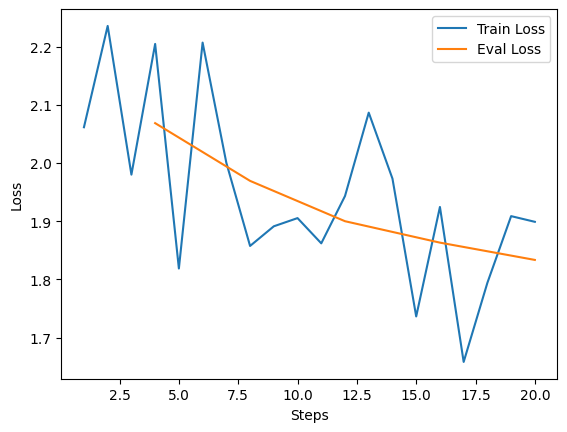

In [37]:
import matplotlib.pyplot as plt

# Initialize lists to hold training and evaluation losses and steps
train_losses = []
eval_losses = []
train_steps = []
eval_steps = []

# Populate the lists from the log history
for entry in trainer.state.log_history:
    if 'loss' in entry:
        train_losses.append(entry['loss'])
        train_steps.append(entry['step'])
    if 'eval_loss' in entry:
        eval_losses.append(entry['eval_loss'])
        eval_steps.append(entry['step'])

# Plot the losses
plt.plot(train_steps, train_losses, label='Train Loss')
plt.plot(eval_steps, eval_losses, label='Eval Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate after Training

In [38]:
# # Can set to true for faster inference
# model.config.use_cache = True

In [39]:
evaluation("base", tokenizer) #use this if training was done with an adapter preloaded. btw you'll always be running the model at the final checkpoint.

eval_model is on: cuda:0
input_ids are on: cuda:0
<｜begin▁of▁sentence｜>
### Instruction:
What planets are in our solar system?
### Response:
The planets in our solar system are Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune.

Mercury is the smallest planet in our solar system and is the closest to the sun.

Venus is the second planet from the sun and is the second largest planet in our solar system.

Earth is the third planet from the sun and is the largest planet in our solar system.

Mars



eval_model is on: cuda:0
input_ids are on: cuda:0
<｜begin▁of▁sentence｜>
### Instruction:
What are the first five numbers in the Fibonacci series?
### Response:
The first five numbers in the Fibonacci series are:

1, 1, 2, 3, and 5.

These are the first five numbers in the Fibonacci series, which are the numbers in the sequence of numbers that are generated by adding the previous two numbers in the sequence.<｜end▁of▁sentence｜>



eval_model is on: cuda:0
input_ids are on: cuda:0

In [40]:
# checkpoint = save_dir + '/checkpoint-1'
# evaluation("fine-tuned", checkpoint)

In [41]:
# checkpoint = save_dir + '/checkpoint-15'
# evaluation("fine-tuned", checkpoint)

In [42]:
# checkpoint = save_dir + '/checkpoint-30'
# evaluation("fine-tuned", checkpoint)

In [43]:
# checkpoint = save_dir + '/checkpoint-45'
# evaluation("fine-tuned", checkpoint)

In [44]:
# checkpoint = save_dir + '/checkpoint-60'
# evaluation("fine-tuned", checkpoint)

In [45]:
Stop HERE before pushing to Hub. Comment this out to allow the script to proceed.

SyntaxError: invalid syntax (476177386.py, line 1)

# Merge Adapters and Save Model to Hub

In [ ]:
### Only relevant if trying to load earlier adapters onto the base model.
# from peft import PeftModel

# adapter_to_push = save_dir + '/checkpoint-60'

# # load perf model with new adapters
# model_to_push = PeftModel.from_pretrained(
#     model,
#     adapter_to_push,
# )

In [ ]:
# Define the save and push paths
adapter_model = f"Trelis/{model_name}-{fine_tune_tag}-adapters"
new_model = f"Trelis/{model_name}-{fine_tune_tag}" #adjust 'Trelis' to your HuggingFace organisation

In [ ]:
# Save the model
model.save_pretrained(f"{model_name}-{fine_tune_tag}-adapters-local", push_to_hub=True, use_auth_token=True)

In [ ]:
model.push_to_hub(adapter_model, use_auth_token=True, max_shard_size="10GB", use_safetensors=True)

In [ ]:
# upload the trainable_params as well

from huggingface_hub import HfApi, create_repo, create_branch

create_repo(new_model, private=True)

create_branch(new_model, repo_type="model", branch="gguf")

# Initialize the HfApi class
api = HfApi()

# Specify the repository where you want to upload the files
repo_id = adapter_model

# Array of local file paths you want to upload
local_file_paths = [
    save_dir + "/trainable_params_final.bin",
]

# Loop through each file and upload it
for local_file_path in local_file_paths:
    # Extract the file name from the local file path
    file_name = local_file_path.split("/")[-1]

    # Specify the path where you want the file to be uploaded in the repository
    path_in_repo = file_name  # Using file_name directly, adjust as needed

    # Upload the file
    api.upload_file(
        path_or_fileobj=local_file_path,
        path_in_repo=path_in_repo,
        repo_id=repo_id,
        repo_type="model",  # Assuming it's a model; can be "dataset" or "space" as well
    )
    print(f"Uploaded {file_name} to {repo_id}")

In [ ]:
### Only needed if doing QLoRA - but you also need some more logic to be able to add in the non-LoRA trained parameters

# # from transformers import AutoModelForCausalLM, PretrainedConfig
# # import torch

# # reload the base model (you might need a pro subscription for this because you may need a high RAM environment since this is loading the full original model, not quantized)
# model = AutoModelForCausalLM.from_pretrained(
#     base_model,
#     quantization_config=bnb_config, # important to merge to the quantized version, otherwise there's small error
#     device_map='cpu',
#     trust_remote_code=True,
#     torch_dtype=torch.float16,
#     cache_dir=cache_dir)

In [ ]:
model = model.merge_and_unload()

In [ ]:
model.save_pretrained(f"{model_name}-{fine_tune_tag}-local")

# Save the tokenizer to make sure the updated config is saved as well
tokenizer.save_pretrained(f"{model_name}-{fine_tune_tag}-local")

In [ ]:
#Push the tokenizer

# # OR Reload from scratch if you don't want pad tokens to be in the tokenizer (which you don't if this makes the tokenizer size not be a multiple of 16)
# from transformers import AutoTokenizer
# tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)

## SET A CHAT TEMPLATE - RECOMMENDED!
# DeepSeek Coder Chat Template
tokenizer.chat_template = "{% if not add_generation_prompt is defined %}{% set add_generation_prompt = false %}{% endif %}{%- set ns = namespace(found=false) -%}{%- for message in messages -%}{%- if message['role'] == 'system' -%}{%- set ns.found = true -%}{%- endif -%}{%- endfor -%}{{bos_token}}{%- if not ns.found -%}{{'You are an AI assistant and you do your best to answer all questions and requests\n'}}{%- endif %}{%- for message in messages %}{%- if message['role'] == 'system' %}{{ message['content'] }}{%- else %}{%- if message['role'] == 'user' %}{{'Instruction:' + message['content'] + '\n'}}{%- else %}{{'\nOutput:' + message['content'] + '\n<|EOT|>\n'}}{%- endif %}{%- endif %}{%- endfor %}{% if add_generation_prompt %}{{'\nOutput:'}}{% endif %}"

tokenizer.push_to_hub(new_model, use_auth_token=True)

In [ ]:
model.push_to_hub(new_model, use_auth_token=True, max_shard_size="10GB", use_safetensors=True)

In [ ]:
import os
import requests
from huggingface_hub import HfApi

def download_file_from_huggingface(model_id, filename, save_path):
    url = f"https://huggingface.co/{model_id}/resolve/main/{filename}"
    r = requests.get(url)
    if r.status_code != 200:
        print(f"Failed to download {filename}. HTTP Status Code: {r.status_code}")
        return False
    with open(os.path.join(save_path, filename), 'wb') as f:
        f.write(r.content)
    return True

def main():
    # Files to download and upload
    files_to_process = ["tokenizer.model", "README.md"]
    
    # Directory to save the downloaded files
    save_path = "./models"
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    
    # Initialize HfApi class
    api = HfApi()

    # Specify the repository where you want to upload the files
    repo_id = new_model  # Assuming new_model is in the format "username/repo"

    for filename in files_to_process:
        # Download the file
        success = download_file_from_huggingface(model_id, filename, save_path)
        if success:
            print(f"Successfully downloaded {filename}")
        else:
            print(f"Failed to download {filename}")
            continue  # Skip uploading if download failed

        # File path to upload
        local_file_path = os.path.join(save_path, filename)

        # Upload the file
        api.upload_file(
            path_or_fileobj=local_file_path,
            path_in_repo=filename,  # Using filename directly, adjust as needed
            repo_id=repo_id,
            repo_type="model",  # Assuming it's a model; can be "dataset" or "space" as well
        )
        print(f"Uploaded {filename} to {repo_id}")

if __name__ == "__main__":
    main()